Используя датасеты о продуктах и их продажах посчитайте корреляции:
* Пирсона
* Спирмена
* Мэтьюса
* Крамера

Ход работы:
* Прочтите данные о продажах и продуктах
* Соедините таблицы друг с другом по id продукта
* Посчитайте корреляцию Спирмена временного ряда продаж каждого продукта с каждым, используя соединенную таблицу
* Посчитайте корреляцию Пирсона временного ряда продаж каждого продукта с каждым, используя соединенную таблицу
* Найдите наиболее коррелирующий товар с American Chicken Hot Dogs по значению корреляции Спирмена и Пиарсона
* Постройте график зависимости продаж American Chicken Hot Dogs от найденного товара (scatterplot) и постройте два графика 1) зависимости продаж American Chicken Hot Dogs от времени 2) зависимости продаж найденного товара от времени (lineplot).
* Найдите корреляцию Мэтьюса между recyclable_package и low_fat
* Постройте гистограммы recyclable_package и low_fat.
* Найдите корреляцию Крамера между store_id и brand_name. Есть ли корреляция между этими признаками?
* Визуализируйте зависимость store_id и brand_name. Тут подумайте, как это можно сделать.

In [3]:
import pandas as pd

In [4]:
sales = pd.read_csv("foodmart.sales.tsv", sep = "\t")
products = pd.read_csv("foodmart.products.tsv", sep = "\t")


In [5]:
df = sales.merge(products, how="inner", on="product_id")
df.head()

,product_id,store_id,date,sales,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,4,6,1997-01-01,4,19,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,True,False,26,10,22.90,18.90,7.93
1,25,6,1997-01-01,3,58,Blue Label,Blue Label Chicken Noodle Soup,62032982707,1.55,9.48,8.47,True,True,21,10,4.98,4.71,22.40
2,48,6,1997-01-01,3,11,Club,Club String Cheese,76026721596,1.88,6.31,3.30,True,True,17,7,5.22,18.70,11.20
3,76,6,1997-01-01,4,8,Red Spade,Red Spade Sliced Chicken,62054644227,1.69,18.10,17.10,False,True,4,7,14.60,13.50,3.42
4,119,6,1997-01-01,3,79,Faux Products,Faux Products Extra Moisture Shampoo,35068821310,2.28,20.10,19.10,False,False,7,12,7.86,8.33,14.70


In [6]:
sparse_sales = pd.pivot_table(df, values='sales', index=['date', 'store_id'],
                     columns=['product_name'], fill_value = 0)
corr_matrix_spearman = sparse_sales.corr(method="spearman")

corr_matrix_spearman

product_name,ADJ Rosy Sunglasses,Akron City Map,Akron Eyeglass Screwdriver,American Beef Bologna,American Chicken Hot Dogs,American Cole Slaw,American Corned Beef,American Foot-Long Hot Dogs,American Low Fat Bologna,American Low Fat Cole Slaw,...,Washington Apple Juice,Washington Berry Juice,Washington Cola,Washington Cranberry Juice,Washington Cream Soda,Washington Diet Cola,Washington Diet Soda,Washington Mango Drink,Washington Orange Juice,Washington Strawberry Drink
product_name,,,,,,,,,,,,,,,,,,,,,
ADJ Rosy Sunglasses,1.000000,0.097969,0.001993,0.041981,0.050371,-0.033882,-0.007844,0.077134,0.019108,-0.007614,...,0.033237,0.112359,0.076139,0.018318,0.005265,0.018996,0.018471,0.099764,0.039577,0.018928
Akron City Map,0.097969,1.000000,0.022436,0.098703,0.030165,0.030935,0.031788,-0.002137,0.047911,0.098667,...,0.005623,0.030795,0.039333,-0.001983,-0.053719,0.013590,0.040211,0.022333,0.090423,0.055622
Akron Eyeglass Screwdriver,0.001993,0.022436,1.000000,-0.036888,0.029858,0.076507,-0.005579,0.123704,0.052521,0.088301,...,-0.006781,0.004975,0.059180,0.067207,0.046000,-0.016040,-0.003019,0.040994,-0.001277,0.108524
American Beef Bologna,0.041981,0.098703,-0.036888,1.000000,0.027961,-0.032650,0.027374,-0.016565,-0.041241,0.070463,...,0.009394,0.063805,-0.057211,-0.022645,0.005515,0.092713,-0.007196,0.059298,0.059979,0.040561
American Chicken Hot Dogs,0.050371,0.030165,0.029858,0.027961,1.000000,0.014187,-0.000718,0.051069,0.048408,0.058423,...,0.082403,-0.019304,0.070678,0.071697,0.036806,0.062295,-0.021510,-0.007004,0.105569,0.000033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington Diet Cola,0.018996,0.013590,-0.016040,0.092713,0.062295,-0.015969,0.050453,-0.003126,-0.007714,0.042247,...,-0.032531,-0.053064,-0.007445,-0.002923,0.037459,1.000000,0.015116,0.018770,0.025268,0.013656
Washington Diet Soda,0.018471,0.040211,-0.003019,-0.007196,-0.021510,0.074140,0.053977,0.020414,0.013718,-0.007546,...,-0.039151,0.047079,0.107883,0.088316,-0.019259,0.015116,1.000000,-0.025042,0.014216,-0.039504
Washington Mango Drink,0.099764,0.022333,0.040994,0.059298,-0.007004,0.091507,0.056937,0.021470,0.075320,0.011497,...,-0.028520,-0.024756,-0.003357,0.041751,0.159320,0.018770,-0.025042,1.000000,-0.000819,-0.048897


In [7]:
corr_matrix_pearson = sparse_sales.corr(method="pearson")
corr_matrix_pearson

product_name,ADJ Rosy Sunglasses,Akron City Map,Akron Eyeglass Screwdriver,American Beef Bologna,American Chicken Hot Dogs,American Cole Slaw,American Corned Beef,American Foot-Long Hot Dogs,American Low Fat Bologna,American Low Fat Cole Slaw,...,Washington Apple Juice,Washington Berry Juice,Washington Cola,Washington Cranberry Juice,Washington Cream Soda,Washington Diet Cola,Washington Diet Soda,Washington Mango Drink,Washington Orange Juice,Washington Strawberry Drink
product_name,,,,,,,,,,,,,,,,,,,,,
ADJ Rosy Sunglasses,1.000000,0.076608,-0.006581,0.038685,0.041105,-0.045887,-0.008466,0.062309,0.033752,-0.009656,...,0.053533,0.072249,0.061736,-0.000735,0.000843,0.028226,0.012653,0.089932,0.072668,0.035745
Akron City Map,0.076608,1.000000,0.026297,0.088709,0.061144,0.039347,0.019767,-0.005998,0.010270,0.078176,...,-0.021793,0.020514,0.051956,-0.001018,-0.032582,0.007142,0.035274,0.033875,0.078070,0.051952
Akron Eyeglass Screwdriver,-0.006581,0.026297,1.000000,-0.040851,0.034345,0.108726,0.007573,0.162355,0.020933,0.074292,...,-0.000237,-0.001297,0.049793,0.055047,0.031202,0.013510,-0.017855,0.022714,0.003156,0.163519
American Beef Bologna,0.038685,0.088709,-0.040851,1.000000,0.014780,-0.039118,-0.007890,-0.008264,-0.045949,0.085975,...,0.000197,0.081151,-0.053404,-0.021832,0.003286,0.090774,-0.031954,0.043843,0.080638,0.055211
American Chicken Hot Dogs,0.041105,0.061144,0.034345,0.014780,1.000000,-0.005336,0.017765,0.057972,0.071549,0.052460,...,0.098935,-0.024224,0.066212,0.043765,0.077541,0.045038,-0.037246,0.025975,0.129795,-0.008498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington Diet Cola,0.028226,0.007142,0.013510,0.090774,0.045038,-0.019134,0.065257,0.008475,-0.014765,0.040917,...,-0.021486,-0.048885,-0.024276,0.014478,0.023574,1.000000,0.018490,0.047577,0.005696,0.027834
Washington Diet Soda,0.012653,0.035274,-0.017855,-0.031954,-0.037246,0.080757,0.066493,0.034888,-0.001253,0.008366,...,-0.025958,0.037920,0.111450,0.090849,0.023312,0.018490,1.000000,-0.030056,0.009293,-0.046996
Washington Mango Drink,0.089932,0.033875,0.022714,0.043843,0.025975,0.087489,0.068372,0.028454,0.080489,0.013144,...,-0.020503,-0.031946,-0.026589,0.026534,0.116748,0.047577,-0.030056,1.000000,0.014672,-0.051093


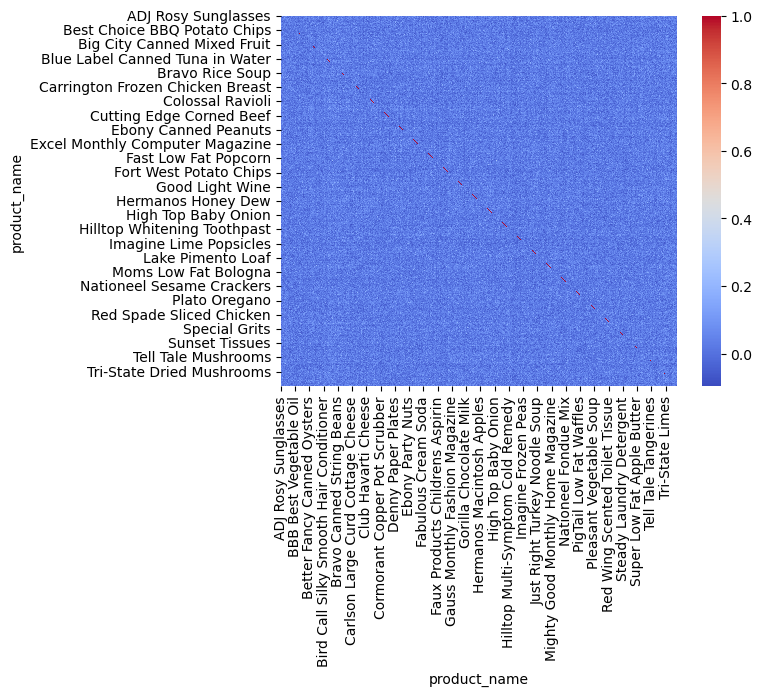

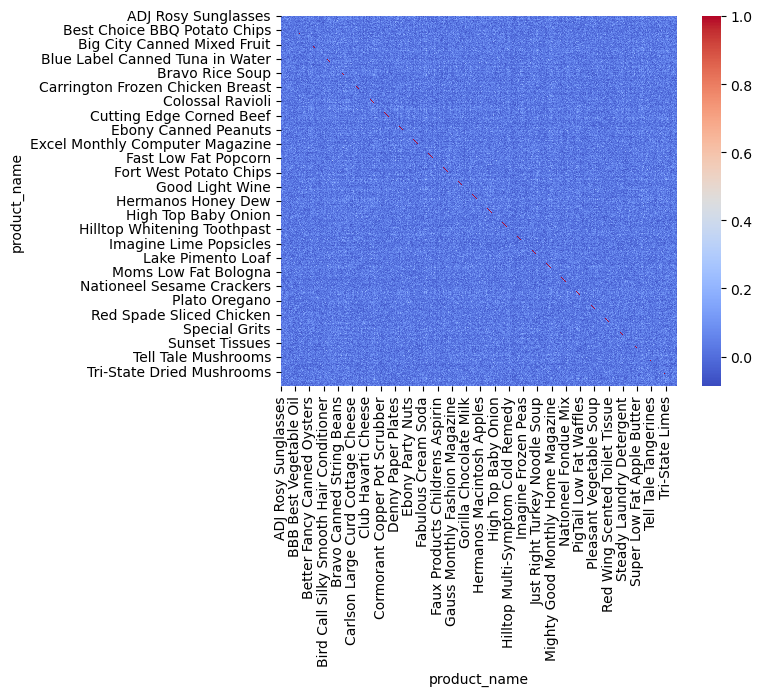

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# решил сделать еще тепловую карту, потому что почему бы и нет

sns.heatmap(corr_matrix_spearman, cmap='coolwarm')
plt.show()
sns.heatmap(corr_matrix_pearson, cmap="coolwarm")
plt.show()


In [9]:
pearson_correlations = corr_matrix_pearson["American Chicken Hot Dogs"].drop(labels=["American Chicken Hot Dogs"])
spearman_correlations = corr_matrix_spearman["American Chicken Hot Dogs"].drop(labels=["American Chicken Hot Dogs"])

most_correlated_pearson = pearson_correlations.idxmax()
pearson_value = pearson_correlations[most_correlated_pearson]

most_correlated_spearman = spearman_correlations.idxmax()
spearman_value = spearman_correlations[most_correlated_spearman]

# ударение на о
print(f"Большая корреляция с {most_correlated_pearson} по Пирсону: {pearson_value}")
print(f"Большая корреляция с {most_correlated_spearman} по Спирману: {spearman_value}")

Большая корреляция с Mighty Good Monthly Home Magazine по Пирсону: 0.24026934048270548
Большая корреляция с Great Cranberry Muffins по Спирману: 0.1981052950789763


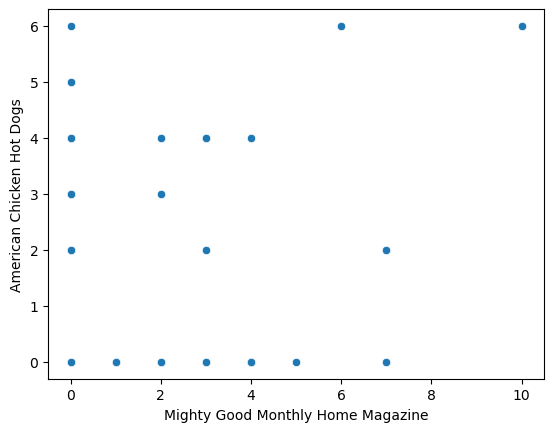

In [10]:
sales_target_product = sparse_sales['American Chicken Hot Dogs']
sales_correlated_product = sparse_sales[most_correlated_pearson]

sns.scatterplot(x=sales_correlated_product, y = sales_target_product)
plt.show()

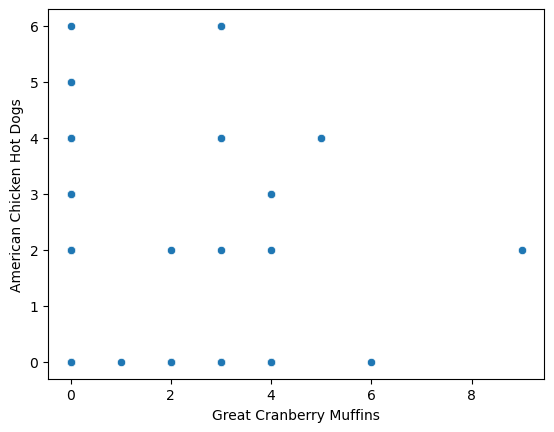

In [11]:
sales_target_product = sparse_sales['American Chicken Hot Dogs']
sales_correlated_product = sparse_sales[most_correlated_spearman]

sns.scatterplot(x=sales_correlated_product, y = sales_target_product)
plt.show()

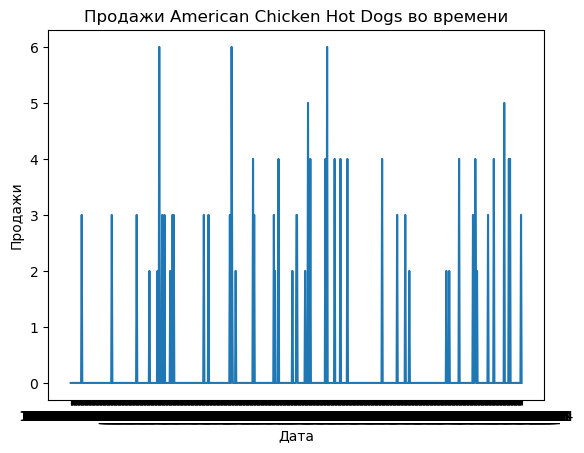

In [12]:
plt.plot(sales_target_product.index.map(lambda x: f"{x[0]}_{x[1]}"), sales_target_product.values)
plt.title(f'Продажи American Chicken Hot Dogs во времени')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()

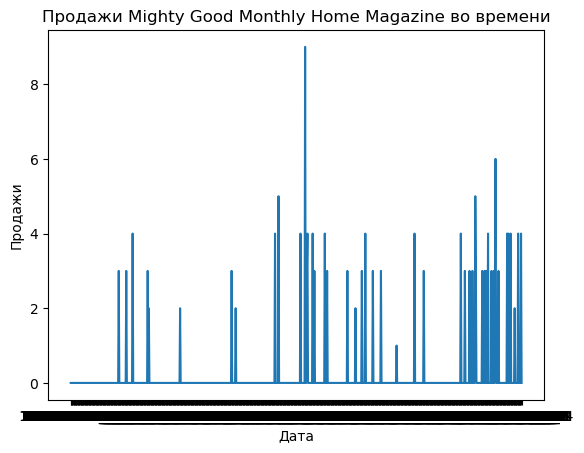

In [13]:
plt.plot(sales_correlated_product.index.map(lambda x: f"{x[0]}_{x[1]}"), sales_correlated_product.values)
plt.title(f'Продажи {most_correlated_pearson} во времени')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()

In [14]:
from sklearn.metrics import matthews_corrcoef

# считаем корреляцию мэтьюса

m_corr = matthews_corrcoef(df["recyclable_package"], df["low_fat"])

print(f"Корреляция Мэтьюса между recyclable_package и low_fat: {m_corr}")

Корреляция Мэтьюса между recyclable_package и low_fat: -0.022364293265823097


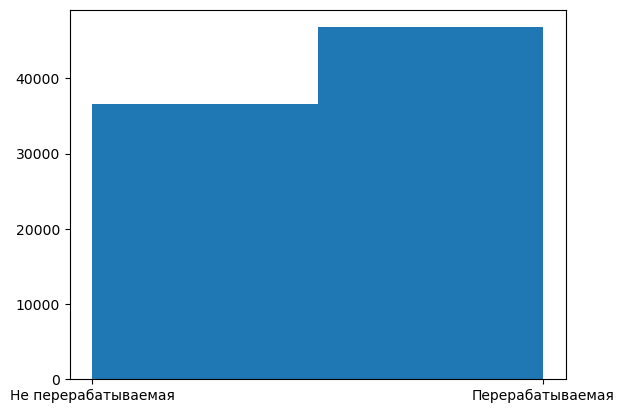

In [15]:
# строим гистограмму для перерабатываемых пакетов

plt.hist(df[["recyclable_package"]].astype(int), bins = df["recyclable_package"].unique().shape[0])
plt.xticks([0, 1], ['Не перерабатываемая', 'Перерабатываемая'])
plt.show()

In [16]:
from scipy.stats import chi2_contingency
import numpy as np

# считаем корреляцию Крамера
contingency_table = pd.crosstab(df["store_id"], df["brand_name"])

chi2, p, dof, expected = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()

k = min(contingency_table.shape) - 1

cramers_v = np.sqrt(chi2 / (n * k))

print(f"Корреляция Крамера V между store_id и brand_name: {round(cramers_v, 3)}")


Корреляция Крамера V между store_id и brand_name: 0.034


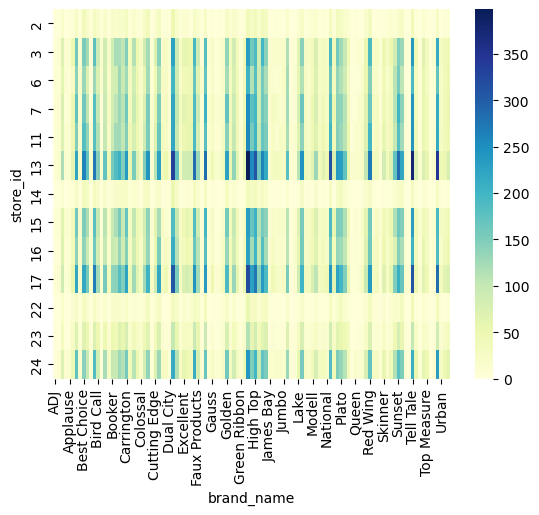

In [17]:
# тепловая карта для таблицы сопряженности
sns.heatmap(contingency_table, cmap='YlGnBu')

plt.xlabel('brand_name')
plt.ylabel('store_id')
plt.show()
# выглядит если честно так себе

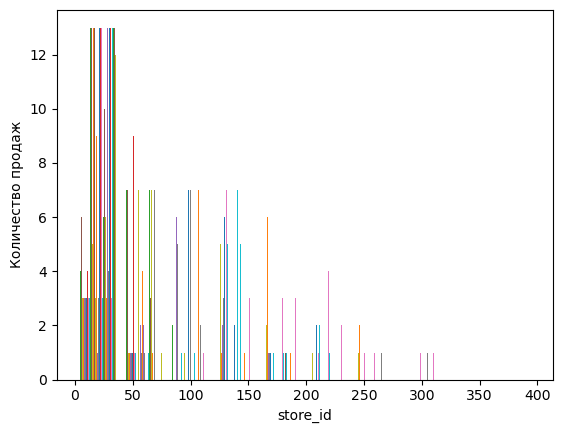

In [18]:
# гистограмма по сгруппированым магазинам
group_data = df.groupby(['store_id', 'brand_name']).size().reset_index(name='counts')

pivot_data = group_data.pivot(index='store_id', columns='brand_name', values='counts').fillna(0)

plt.hist(pivot_data)
plt.xlabel("store_id")
plt.ylabel("Количество продаж")
plt.show()
